In [1]:
from matplotlib import pyplot as plt
import numpy as np


def parse(fn):
    m,P= open(fn).read().split("\n\n")
    #print(m)
    M={}
    r=None
    for y,l in enumerate(m.split("\n")):
        for x,c in enumerate(l):
            if c in "@#.O":
                p=x+y*1j
                #print(p,c)
                if c=="@":
                    r=p
                M[p]=c
    return M,P,r

dirs="^>v<"

def push(M,r,p,d):
    if not M[p+d] in "#.":
        M,r=push(M,r,p+d,d)
    
    if M[p+d]==".":
        t=M[p+d]
        M[p+d]=M[p]
        M[p]=t
        if M[p+d]=="@":
            r=p+d
    return M,r

def dims(M):
    w=max([x.real+1 for x in M.keys()])
    h=max([x.imag+1 for x in M.keys()])
    return int(w),int(h)

def render(M,image):
    return
    h,w,depth=image.shape
    image*=0
    for p in M.keys():
        x=int(p.real)
        y=int(p.imag)
        c=M[p]
        if c=="O":
            c=[0,1,0]
        elif c=="#":
            c=[0,0,0]
        elif c==".":
            c=[1,1,1]
        else:
            c=[1,0,1]
            
            
        image[y,x,:]=c
    plt.imshow(image, cmap='gray')
    plt.show()
        
    
    
    
def part1(fn):
    M,P,r=parse(fn)
    w,h=dims(M)
    image = np.random.rand(h, w, 3)

    
    render(M,image)
    for i in P:
        #print(i)
        
        if i in dirs:
            d=-1j
            for j in range(dirs.index(i)):
                d*=1j
            M,r=push(M,r,r,d)
        render(M,image)
    v=0
    for p in M.keys():
        if M[p]=="O":
            v+=int(p.real+p.imag*100)
    return v



print("test1:",part1("15.tst"),10092)
print("part1:",part1("15.txt"),1406628)

                      
                      


test1: 10092 10092
part1: 1406628 1406628


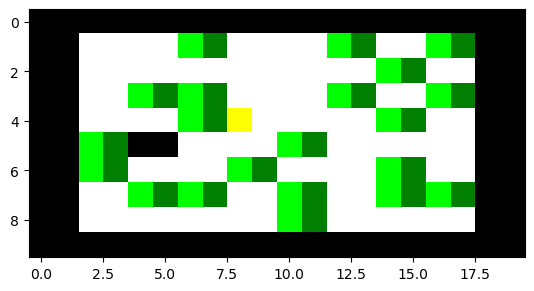

test2: 9021 9021


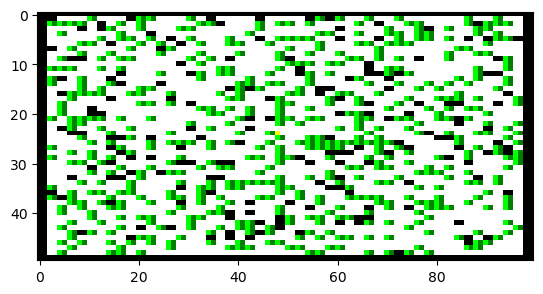

part2: 1432781 1432781


In [2]:
from matplotlib import pyplot as plt
import numpy as np


def parse(fn):
    m,P= open(fn).read().split("\n\n")
    #print(m)
    M={}
    r=None
    for y,l in enumerate(m.split("\n")):
        for x,c in enumerate(l):
            if c in "@#.O":
                p=x*2+y*1j
                #print(p,c)
                
                if c=="@":
                    r=p
                    M[p]=c
                    M[p+1]="."
                elif c=="O":
                    M[p]="["
                    M[p+1]="]"
                else:
                    M[p]=c
                    M[p+1]=c
                
    return M,P,r

dirs="^>v<"

def canpush(M,r,p,d):
    c=M[p+d]
    if c==".":
        return 1
    elif c=="#":
        return 0
    elif c in "[]":
        if d.imag==0:
            return canpush(M,r,p+d,d)
        else:
            z=0
            z+=canpush(M,r,p+d,d)
            if c=="[":
                z+=canpush(M,r,p+d+1,d)
            else:
                z+=canpush(M,r,p+d-1,d)
            if z==2:
                return 1
    return 0

def push2(M,r,p,d):
    if M[p+d] in "[]":
        if d.imag==0:
            M,r=push2(M,r,p+d,d)
        else:
            if M[p+d]=="[":
                M,r=push2(M,r,p+d+1,d)
                M,r=push2(M,r,p+d,d)
            else:
                M,r=push2(M,r,p+d,d)
                M,r=push2(M,r,p+d-1,d)
    
    if M[p+d]==".":
        
        t=M[p+d]
        M[p+d]=M[p]
        M[p]=t
        if M[p+d]=="@":
            r=p+d
    return M,r


def dims(M):
    w=max([x.real+1 for x in M.keys()])
    h=max([x.imag+1 for x in M.keys()])
    return int(w),int(h)

def render(M,r,image):
    
    h,w,depth=image.shape
    image*=0
    for p in M.keys():
        x=int(p.real)
        y=int(p.imag)
        c=M[p]
        if c in "[":
            c=[0,1,0]
        elif c in "]":
            c=[0,0.5,0]   
        elif c=="#":
            c=[0,0,0]
        elif c==".":
            c=[1,1,1]
        else:
            c=[1,0,1]
            
            
        image[y,x,:]=c
    image[int(r.imag),int(r.real),:]=[1,1,0]
    plt.imshow(image)
    plt.show()
        
    
    
    
def part2(fn,dbg):
    M,P,r=parse(fn)
    w,h=dims(M)
    assert(w*h==len(set(M.keys())))
    image = np.random.rand(h, w, 3)

    
    render(M,r,image)
    for i in P:
        if dbg:
            print(i)
        
        if i in dirs:
            d=-1j
            for j in range(dirs.index(i)):
                d*=1j
            if canpush(M,r,r,d):
                #print("yes")
                M,r=push2(M,r,r,d)
            else:
                pass
                #print("no")
        if dbg:
            render(M,r,image)
    v=0
    for p in M.keys():
        if M[p]=="[":
            v+=int(p.real+p.imag*100)
    return v

#print("test2:",part2("15.tst",0),9021)

print("test2:",part2("15.tst",0),9021)
print("part2:",part2("15.txt",0),1432781)

                      
                      
